In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

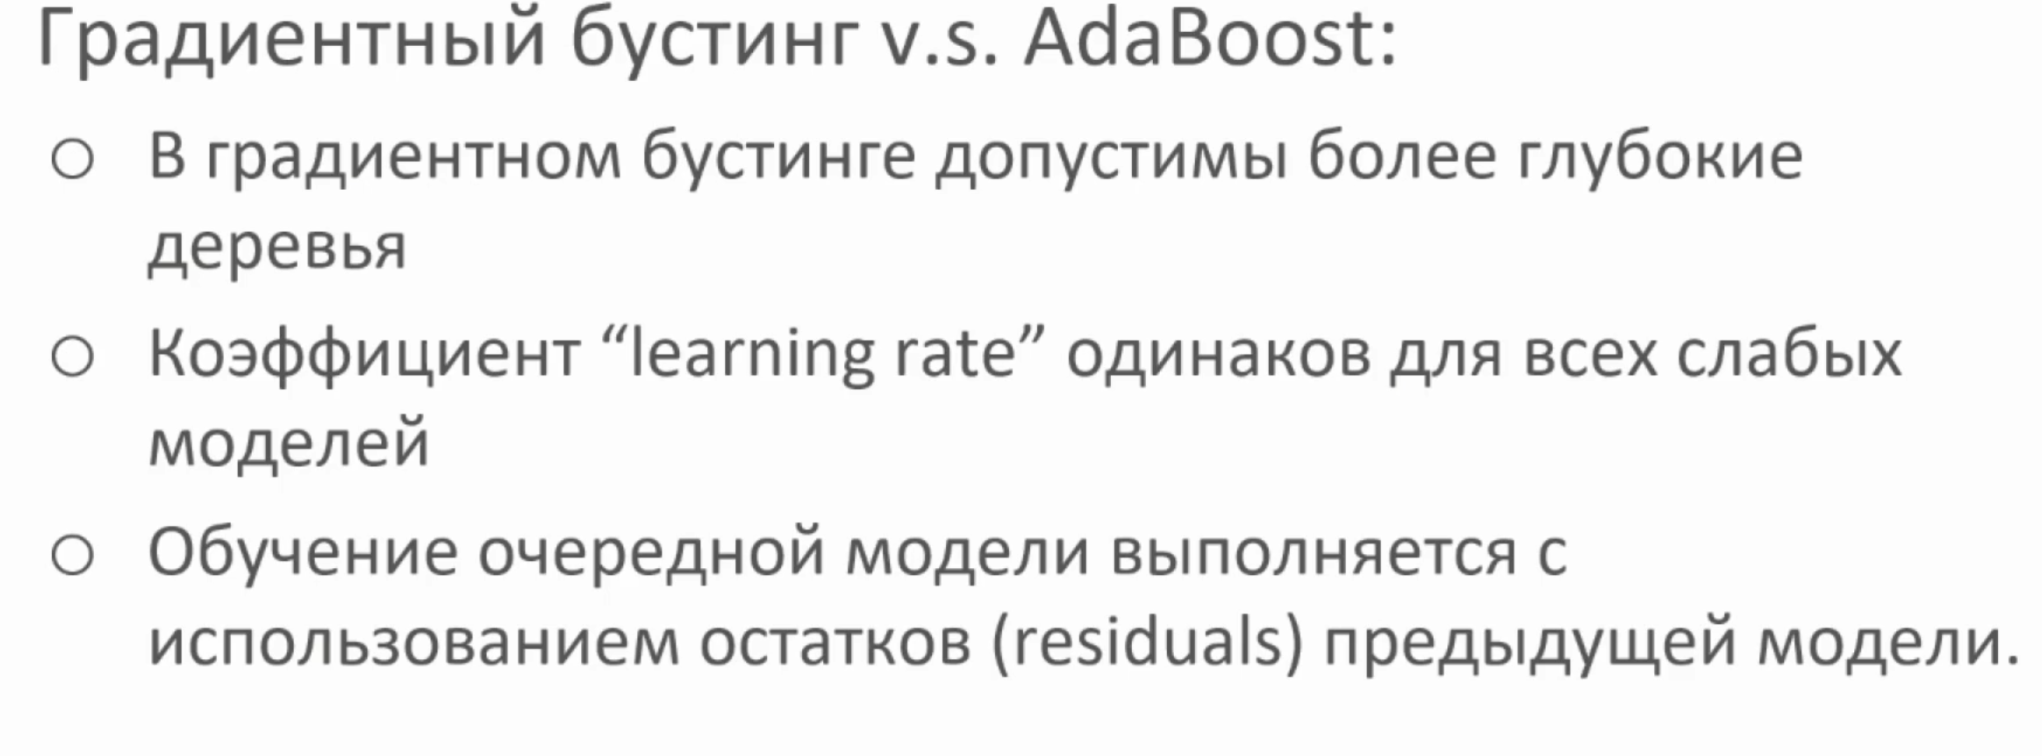
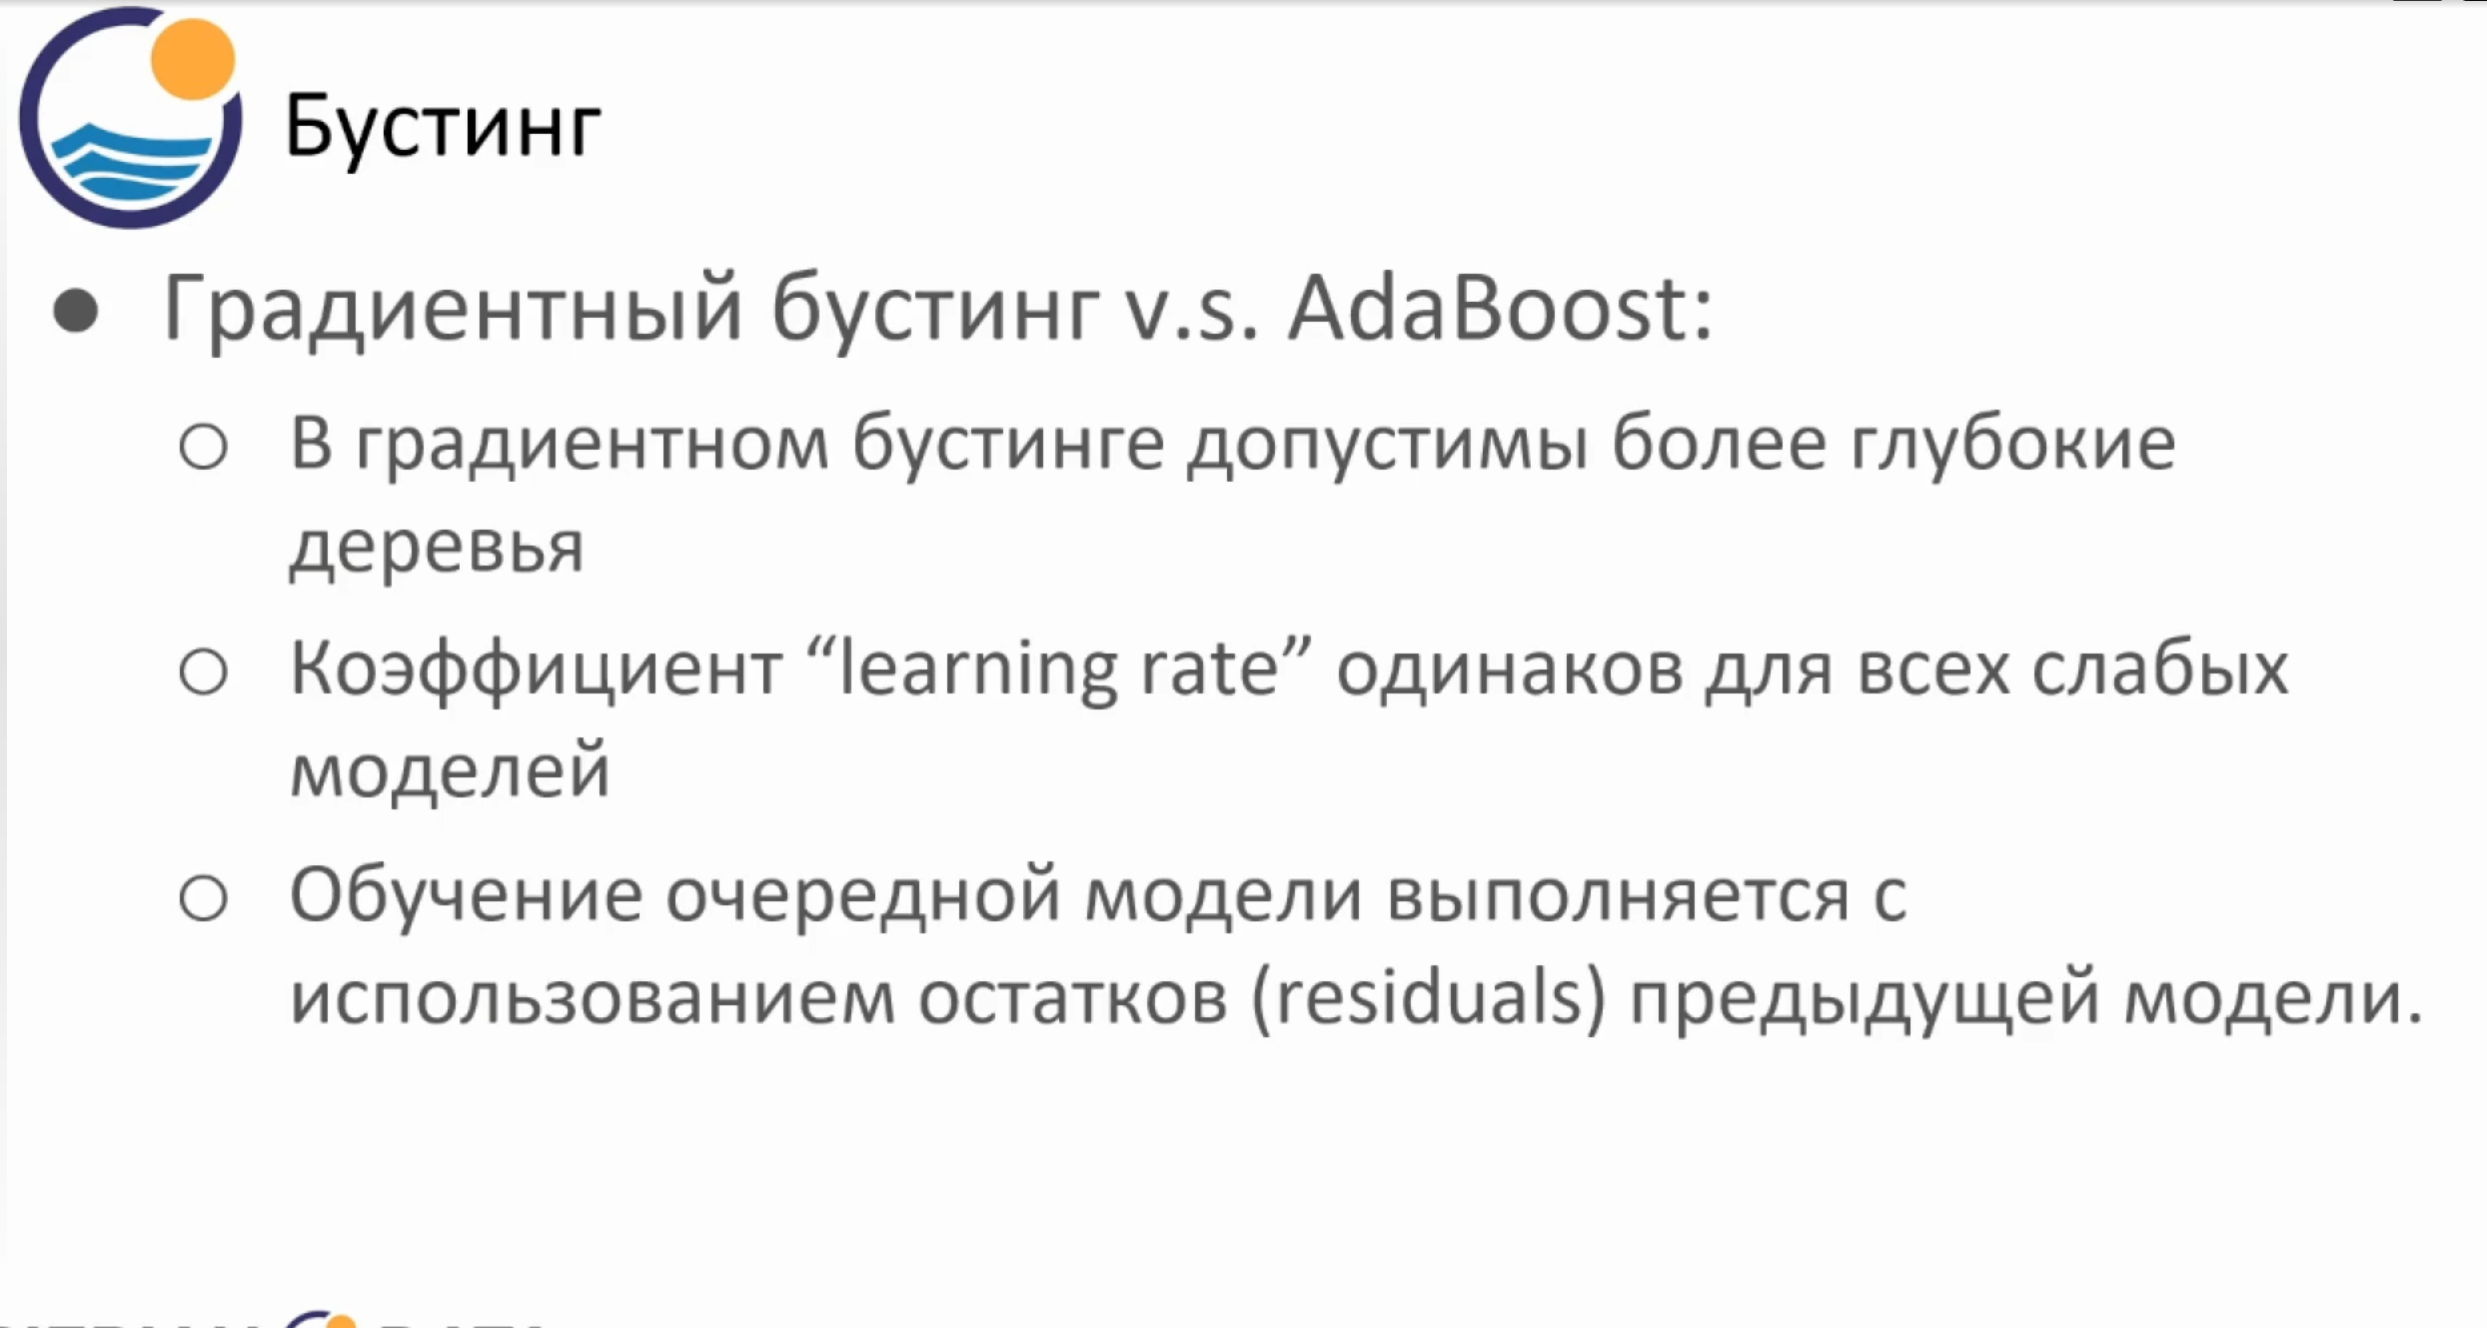

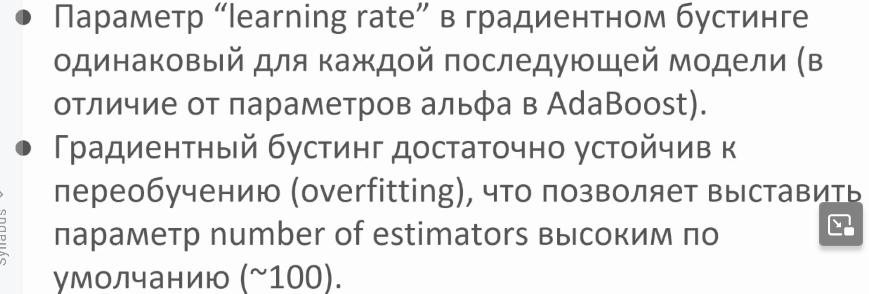
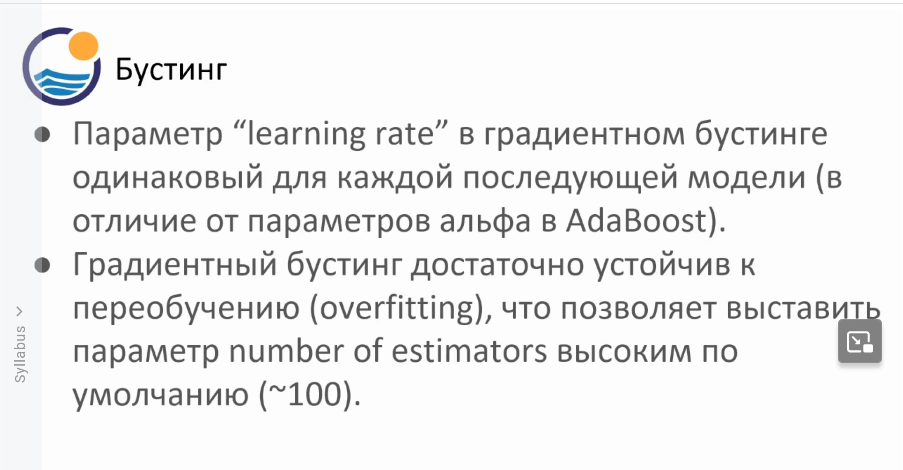

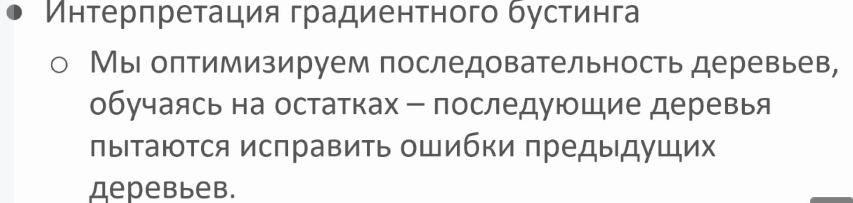
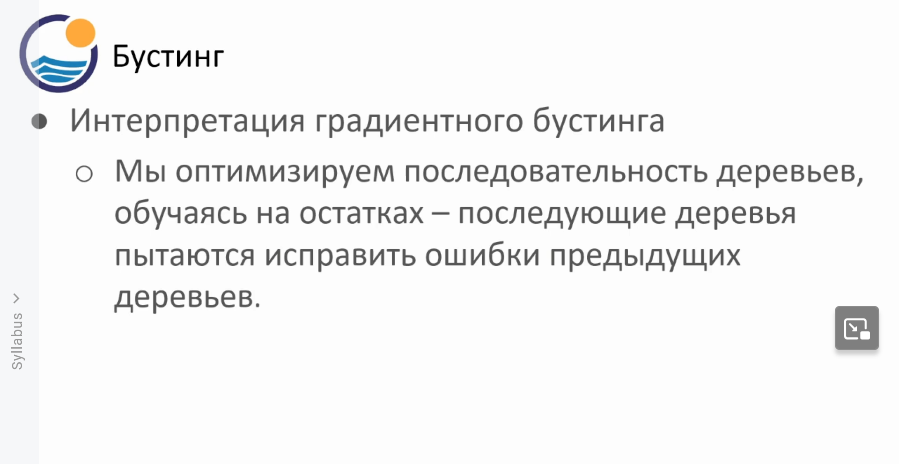

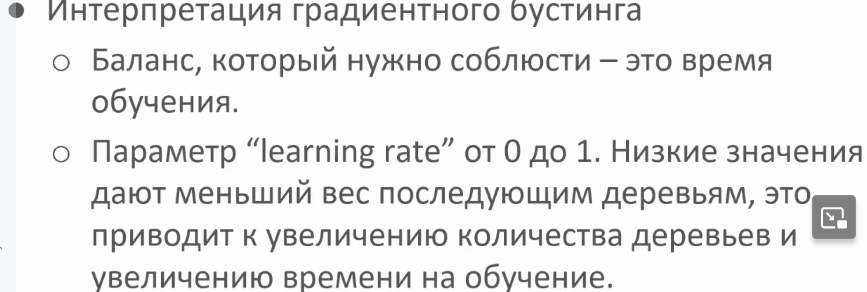
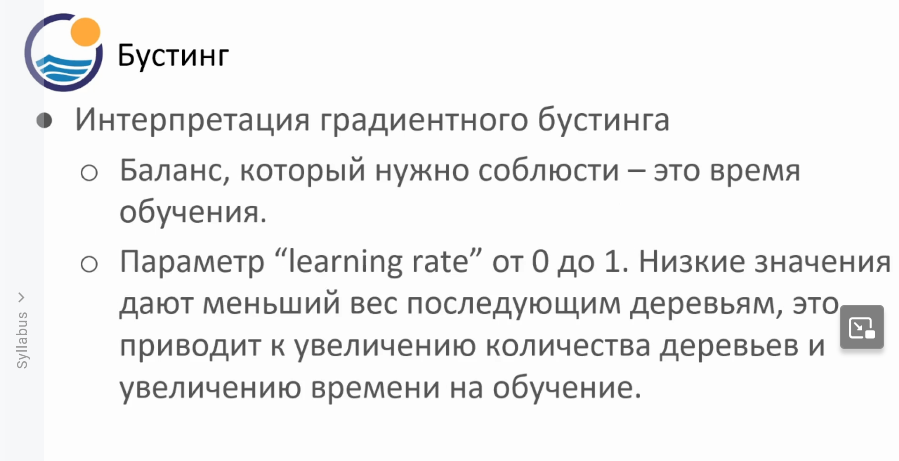

In [2]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [3]:
X = df.drop('class', axis=1)

In [4]:
X = pd.get_dummies(X, drop_first=True, dtype=int)

In [5]:
y = df['class']

In [7]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
gb_model = GradientBoostingClassifier()

In [15]:
param_grid = {'n_estimators': [50, 100],
            'learning_rate': [0.1, 0.05, 0.2],
            'max_depth': [3, 4, 5]}

In [37]:
grid = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, verbose=3)

In [38]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=1.000 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.998 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=1.000 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=1.000 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=1.000 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.998 total time=   0.6s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=1.000 total time=   0.6s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=1.000 total time=  

,estimator,GradientBoostingClassifier()
,param_grid,"{'learning_rate': [0.1, 0.05, ...], 'max_depth': [3, 4, ...], 'n_estimators': [50, 100]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [40]:
grid.best_estimator_

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,50
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [39]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [41]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [42]:
y_pred = grid.best_estimator_.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [46]:
feats_importance = grid.best_estimator_.feature_importances_

In [47]:
feats_importance = pd.DataFrame(index=X.columns, data=feats_importance, columns=['Importance'])

In [52]:
important_feats = feats_importance[feats_importance['Importance'] > 0.0005]
important_feats

,Importance
cap-surface_g,0.001687
cap-color_y,0.002523
bruises_t,0.054328
odor_f,0.021416
odor_l,0.020737
odor_m,0.001695
odor_n,0.615608
odor_p,0.000814
gill-spacing_w,0.012851
gill-size_n,0.011487


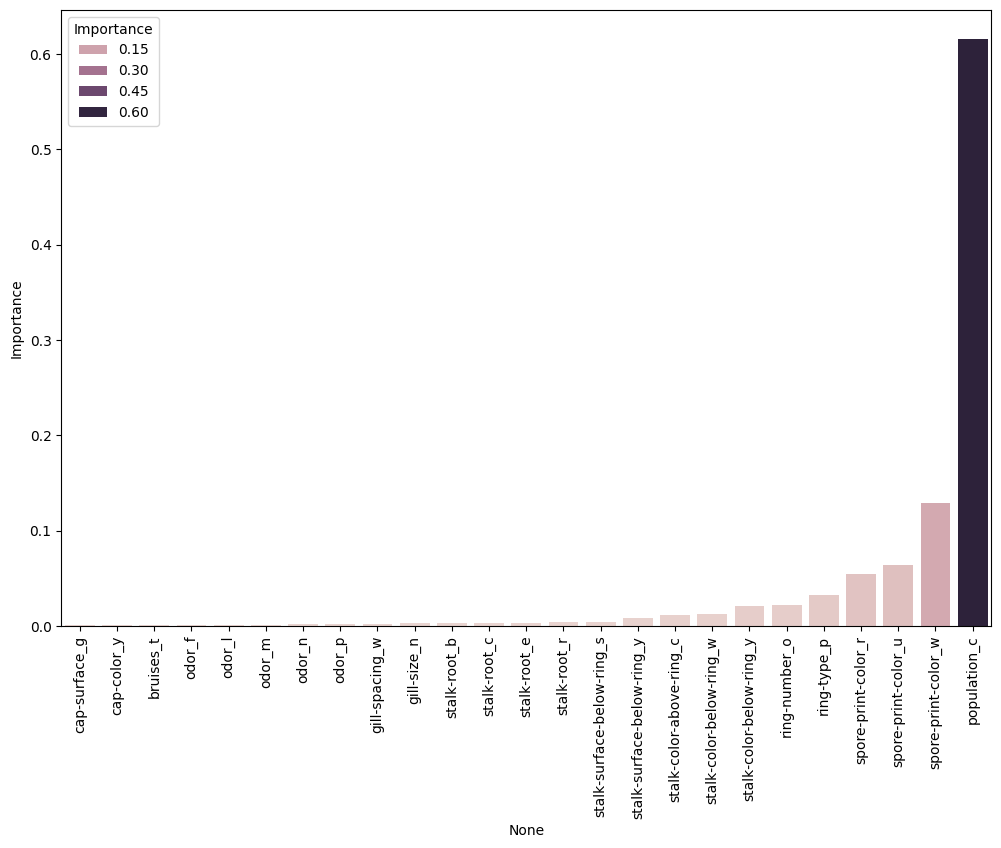

In [58]:
plt.figure(figsize=(12, 8))

sns.barplot(data=important_feats.sort_values('Importance'), x=important_feats.index, y='Importance', hue='Importance')
plt.xticks(rotation=90);